# Seasonal Trend Decomposition using LOESS 


## STL parameters

### `seasonal`:
* Determines the window size for LOESS used when smoothing the seasonal component (i.e, the cycle-subseries). 
 
* The cycle-subseries is the time series formed by the sequence of values from the same period in the seasonal cycle (e.g., the sequence of all the values which occured on January over each year, the sequence of all the values which occured on February over each year, etc.). 

* This parameter determines how smooth the seasonal component is for the same period (e.g., every January) across multiple seasonal cycles (e.g, multiple years).

### `period`: 
* The periodicity of the seasonal component (for yearly seasonality and monthly data, this would be 12 because the seasonal pattern repeats every 12 periods). 
* This variable is used to determine the cycle-subseries and also in the low pass filtering step of the algorithm.

### `robust`: 
* A flag to use robustness weights during regression in LOESS. This ensures robustness to outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.utils.plotting import plot_series

from statsmodels.nonparametric._smoothers_lowess import lowess

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import MSTL

## Loading Data

START DATE : 2012-01-01 00:00:00 
END DATE : 2012-05-29 00:00:00


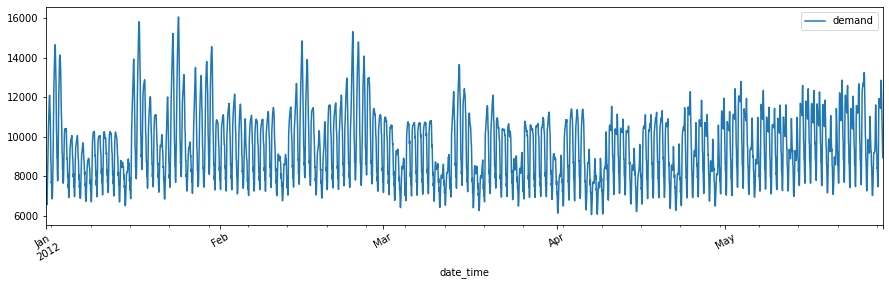

In [2]:
df = pd.read_csv('../../Datasets/victoria_electricity_demand.csv', 
    usecols=['demand', 'date_time'], parse_dates=['date_time'], index_col=['date_time'])

# lets filter the date
start = pd.to_datetime('2012-01-01')
end = start + pd.Timedelta(value='149D')
print(f'START DATE : {start} \nEND DATE : {end}')

series = df.loc[start:end,:].copy()

series.plot(figsize=(15,4))
plt.xticks(rotation=30);

Text(0.5, 1.0, 'period = 6hr')

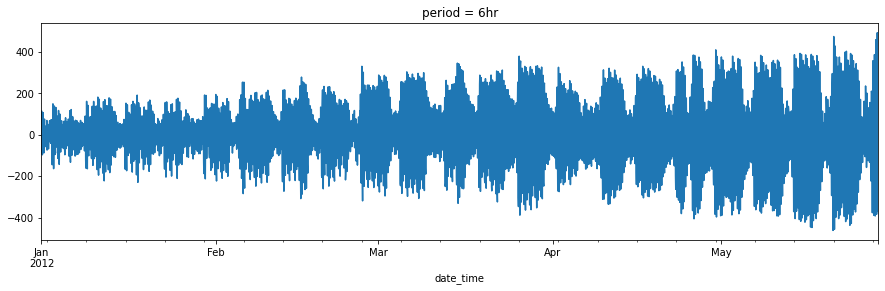

In [19]:
temp = series.copy()

stl_6hr= STL(series, period=6, seasonal=7, seasonal_deg=0).fit()
seasonal_6hr= stl_6hr.seasonal

temp['seasonal_6hr'] = seasonal_6hr
temp['removed_6hr_season'] = temp['demand']-temp['seasonal_6hr']

plt.rc('figure',figsize=(15,6))
stl_6hr.seasonal.plot(figsize=(15,4));
plt.title('period = 6hr')

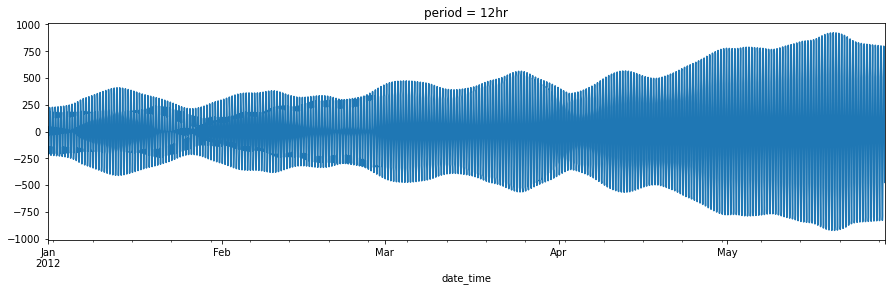

In [63]:
stl_12hr= STL(temp['removed_6hr_season'], period=12, seasonal=27, seasonal_deg=0).fit()
seasonal_12hr= stl_12hr.seasonal

temp['seasonal_12hr'] = seasonal_12hr
temp['removed_12hr_season'] = temp['removed_6hr_season']-temp['seasonal_12hr']

plt.rc('figure',figsize=(15,4))
stl_12hr.seasonal.plot();
plt.title('period = 12hr');

Text(0.5, 1.0, 'Daily seasonal')

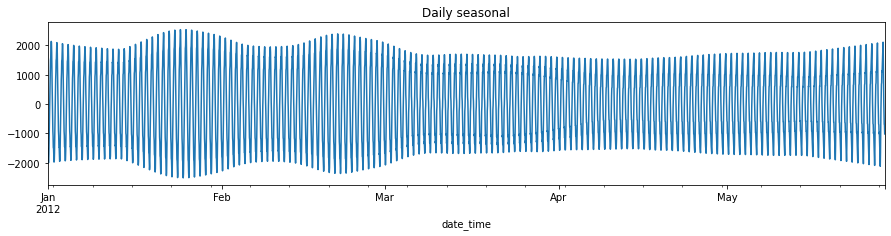

In [60]:
stl_daily = STL(temp['removed_12hr_season'], period=24, seasonal=27).fit()
seasonal_daily = stl_daily.seasonal


temp['seasonal_daily'] = seasonal_daily
temp['removed_daily_season'] = temp['removed_12hr_season']-temp['seasonal_daily']

plt.rc('figure',figsize=(15,3))
stl_daily.seasonal.plot();
plt.title('Daily seasonal')

Text(0.5, 1.0, 'weekly season')

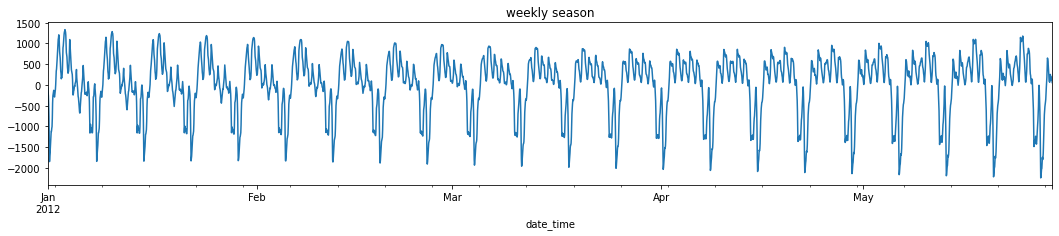

In [61]:

stl_weekly = STL(temp['removed_daily_season'], period=24*7, seasonal=101).fit()
seasonal_weekly = stl_weekly.seasonal


temp['seasonal_weekly'] = seasonal_weekly
temp['removed_weekly_season'] = temp['removed_daily_season']-temp['seasonal_weekly']

plt.rc('figure',figsize=(18,3))
stl_weekly.seasonal.plot();
plt.title('weekly season')

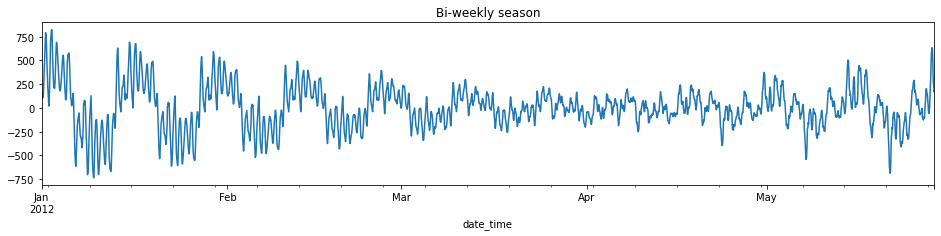

In [62]:
stl_bi_weekly = STL(temp['removed_weekly_season'], period=24*14, seasonal=141).fit()
seasonal_bi_weekly = stl_bi_weekly.seasonal

temp['seasonal_bi_weekly'] = seasonal_bi_weekly
temp['removed_bi_weekly_season'] = temp['removed_weekly_season']-temp['seasonal_bi_weekly']

plt.rc('figure',figsize=(16,3))
stl_bi_weekly.seasonal.plot();
plt.title('Bi-weekly season');

#### Structure left in the residuals
There is still structure left in the residuals. This could be due to any of the following reasons: 

* The STL parameters weren't good for this time series, as a result the seasonality has not been extracted perfectly, 
* There are other factors impacting the time series other than trend and seasonality, remember that STL assumes we can break the time series up into: trend + seasonal + residuals , if the underlying data is strongly being influenced by another factor (which may or may not be having an additive or multiplicative impact or perhaps a mix of both!) then the residuals will some structure.

#### Decomposition is not always possible
• Not all time series can be easily broken down into
components


##### Ideally, we would like to capture the trend and seasonality the best we can and continue with what we want to do (e.g., de-seasonalise and de-trend and work with the residuals, or perhaps extrapolate the seasonality and trend to make a forecast). Other than some visual analysis
